In [7]:
!gcloud auth application-default login --client-id-file client_secret.json --scopes='https://www.googleapis.com/auth/cloud-platform,https://www.googleapis.com/auth/generative-language.tuning' --quiet

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=919951238162-6lail8fvcourrcto6pev5ljlcgpusbt3.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8085%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fgenerative-language.tuning&state=Uhqve7jJinzxBQZuivtNVHdiZQ3vuN&access_type=offline&code_challenge=BljnZdlkzncvmmhO5VyN9d8pg3Ytpao9sOsWUW5hnu4&code_challenge_method=S256


Credentials saved to file: [/Users/srikanthbanda/.config/gcloud/application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).


In [8]:
%pip install -q google-generativeai

Note: you may need to restart the kernel to use updated packages.


In [17]:
import os
os.environ["GOOGLE_CLOUD_PROJECT"] = "gen-lang-client-0937362318"

# Manually set the path to your ADC
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/srikanthbanda/.config/gcloud/application_default_credentials.json"

# Now import the library and it should use the credentials
import google.generativeai as genai

In [18]:
!echo $GOOGLE_APPLICATION_CREDENTIALS

/Users/srikanthbanda/.config/gcloud/application_default_credentials.json


In [19]:
from google.auth import default

credentials, project = default()
print(f"Using credentials from: {credentials}")
print(f"Project: {project}")


Using credentials from: <google.oauth2.credentials.Credentials object at 0x7feaf10ba230>
Project: gen-lang-client-0937362318


In [1]:
import google.generativeai as genai

/Users/srikanthbanda/Documents/Fall 2023/Job prep/Data science/Portfolio projects/TextToCSV_WithPandas/cric-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
for i, m in zip(range(5), genai.list_tuned_models()):
  print(m.name)

Unauthenticated: 401 API keys are not supported by this API. Expected OAuth2 access token or other authentication credentials that assert a principal. See https://cloud.google.com/docs/authentication [reason: "CREDENTIALS_MISSING"
domain: "googleapis.com"
metadata {
  key: "service"
  value: "generativelanguage.googleapis.com"
}
metadata {
  key: "method"
  value: "google.ai.generativelanguage.v1beta.ModelService.ListTunedModels"
}
]

In [ ]:
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods][0]
base_model

Model(name='models/gemini-1.0-pro-001',
      base_model_id='',
      version='001',
      display_name='Gemini 1.0 Pro 001 (Tuning)',
      description=('The best model for scaling across a wide range of tasks. This is a stable '
                   'model that supports tuning.'),
      input_token_limit=30720,
      output_token_limit=2048,
      supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
      temperature=0.9,
      max_temperature=None,
      top_p=1.0,
      top_k=None)

In [ ]:
import json
def read_json(json_file):
    # Open the JSON file for reading
    with open(json_file, 'r') as file:
        data = json.load(file)
    return data

In [ ]:
train=read_json("train.json")
train[0]

{'text_input': 'bar plot for top 5 batting average vs right arm medium fast bowlers who faced at least 1000 balls',
 'output': "result=df1[(df1['bowling_style']=='RFM') & (df1['balls_faced']>1000)].sort_values(by='batting_average',ascending=False).head(5).plot(kind='bar',x='batsman',y='batting_average')"}

In [ ]:
main_prompt = """
Context:
Assume the role of an expert data analyst specializing in cricket statistics. Our product generates Python code using Pandas based on "text prompts" input by users. These prompts often involve requests for data filtering, aggregation, or other data manipulation tasks using cricket data stored in DataFrames.

Your task is to convert these natural language prompts into accurate and efficient Python Pandas code. The dataframes for each task will be provided, and you must ensure that the generated code correctly reflects the user's intent.

Instructions for Analysis:
- Convert the natural language prompt into valid Python Pandas code.
- The code should be concise, correct, and directly executable on the provided dataset.
- Avoid including unnecessary text or comments in the output code.
- Enclose each condition with (), especially when handling multiple conditions.
- Ensure that the code correctly handles the dataset's structure and column types.

Metadata: There are 4 dataframes df1,df2,df3,df4 which extracted data from files in below codes:
                df1=pd.read_excel("batters_against_bowlingtype.xlsx")
                df2=pd.read_excel("Bowling_against_left_right_handers.xlsx")
                df3=pd.read_csv("batting_stats.csv")
                df4=pd.read_csv("bowling_stats.csv")

small description for each of the four dataframes:
    df1: This dataframe captures the performance of batsmen against various types of bowling styles.
    df2: This dataframe focuses on the performance of bowlers against batsmen of different batting hands (left-handed or right-handed).
    df3: This dataframe provides an in-depth overview of a batsman's performance across various matches.
    df4: This dataframe offers a detailed breakdown of a bowler's performance across multiple matches.

Column Details in each dataframes:
    df1.dtypes:
                player_id                int64
                batsman                 object
                bat_hand                object
                bowling_style           object
                matches played           int64
                runs_scored              int64
                balls_faced              int64
                batting_strike_rate    float64
                dismissals               int64
                batting_average        float64
    df2.dtypes:
                player_id                int64
                bowler                  object
                bat_hand                object
                bowl_kind               object
                runs_conceded            int64
                ball_bowled              int64
                matches played           int64
                bowling_style           object
                economy                float64
                dismissals               int64
                bowling_average        float64
                bowling_strike_rate    float64
    df3.dtypes:
                player_id                int64
                batsman                 object
                bat_hand                object
                matches played           int64
                runs_scored              int64
                balls_faced              int64
                batting_strike_rate    float64
                dismissals               int64
                boundary_runs            int64
                boundary_balls           int64
                4s                       int64
                6s                       int64
                dots                     int64
                dot_percent            float64
                boundary_percent       float64
                batting_average        float64
    df4.dtypes:
                player_id                int64
                bowler                  object
                bowl_kind               object
                runs_conceded            int64
                ball_bowled              int64
                matches played           int64
                bowling_style           object
                economy                float64
                dismissals               int64
                dotballs                 int64
                dotballs_percent       float64
                bowling_average        float64
                bowling_strike rate    float64

    Columns 'bowling_style' has values :'LFM', 'SLA', 'RM', 'LWS', 'OB', 'RWS', 'RF', 'RFM', 'LF', 'LM', 'LSM'.
                'LFM' stands for Left Arm Medium Fast
                'SLA' stands for Left Arm OffSpinner
                'RM'  stands for Right Arm Medium
                'LWS' stands for Left Arm WristSpinner,
                'OB'  stands for Right Arm OffSpinner
                'RWS' stands for Right Arm WristSpinner
                'RF'  stands for Right Arm Fast
                'RFM' stands for Left Arm Medium Fast
                'LF'  stands for Left Arm Fast
                'LM'  stands for Left Arm Medium
                'LSM' stands for Left Arm Slow Medium
    Columns 'bat_hand' has values :'RHB', 'LHB'.
                'RHB' stands for Right Hand Batsman
                'LHB' stands for Left Hand Batsman

- Prompt 1: "top 5 batting average against Offspinners among batsmen who played more than 50 matches."

    Generated Code:
    result=df1[(df1['matches played']>50) & (df1['bowling_style']=='OB')].sort_values(by='batting_average',ascending=False).head(5)

- Prompt 2: "5 Lowest economy among bowlers against Right handed batsmen who played more than 75 matches"

    Generated Code:
    result=df2[(df2['matches played']>75) & (df2['bat_hand']=='RHB')].sort_values(by='economy',ascending=True).head(5)

- Prompt 3: "5 Batsmen with lowest dot ball percentage who played more than 2000 balls"

    Generated Code:
    result=df3[(df3['balls_faced']>2000)].sort_values(by='dot_percent',ascending=True).head(5)

- Prompt 4: "5 right arm fast Bowlers with lowest bowling average who bowled more than 2000 balls"

    Generated Code:
    result=df4[(df4['ball_bowled']>2000) & (df4['bowling_style']=='RF')].sort_values(by='bowling_average',ascending=True).head(5)

Return only generated code. Always store the output in variable 'result'.Ensure you do not add any extra quotes on the code.
"""

In [ ]:
def concatenate_prefix(pre, train_data):
    for entry in train_data:
        entry['text_input'] = pre + "\n" + entry['text_input']  # Add prefix with newline to each prompt
    return train_data
train=concatenate_prefix(main_prompt+"\n",train)

In [ ]:
import random

name = f'generate-num-{random.randint(0,10000)}'
operation = genai.create_tuned_model(
    # You can use a tuned model here too. Set `source_model="tunedModels/..."`
    source_model=base_model.name,
    training_data=train,
    id = name,
    epoch_count = 100,
    batch_size=4,
    learning_rate=0.002,
)

In [ ]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model

TunedModel(name='tunedModels/generate-num-4966',
           source_model='models/gemini-1.0-pro-001',
           base_model='models/gemini-1.0-pro-001',
           display_name='',
           description='',
           temperature=0.9,
           top_p=1.0,
           top_k=0,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2024, 9, 15, 3, 37, 19, 928961, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2024, 9, 15, 3, 37, 19, 928961, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2024, 9, 15, 3, 37, 21, 256724, tzinfo=datetime.timezone.utc),
                                  complete_time=None,
                                  snapshots=[],
                                  hyperparameters=Hyperparameters(epoch_count=100,
                                                                  batch_size=4,
                                                                  learning_rate=0.002

In [ ]:
model.state

<State.CREATING: 1>

In [ ]:
operation.metadata

total_steps: 625
tuned_model: "tunedModels/generate-num-4966"

In [ ]:
import time

for status in operation.wait_bar():
  time.sleep(20)

  0%|          | 0/625 [00:00<?, ?it/s]

In [ ]:
# operation.cancel()

<Axes: xlabel='epoch', ylabel='mean_loss'>

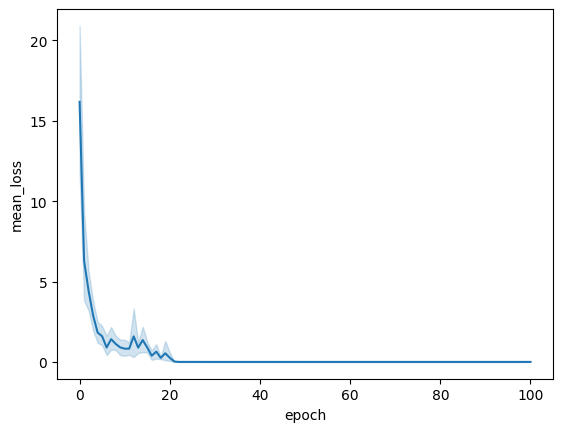

In [ ]:
import pandas as pd
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')


In [ ]:
model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

In [ ]:
prompt = "5 left arm offspinners with lowest economy against left hand batters who bowled 300+ balls"
result = model.generate_content(main_prompt+"\n"+prompt)
result.text

"result = df2[(df2['bowling_style'] == 'OB') & (df2['bat_hand'] == 'LHB') & (df2['ball_bowled'] > 300)].sort_values(by='economy', ascending=True).head(5)\n"

In [ ]:
genai.update_tuned_model(f'tunedModels/{name}', {"description":"This is my model."});

In [ ]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model

NameError: name 'genai' is not defined

In [ ]:
model

TunedModel(name='tunedModels/generate-num-4966',
           source_model='models/gemini-1.0-pro-001',
           base_model='models/gemini-1.0-pro-001',
           display_name='',
           description='This is my model.',
           temperature=0.9,
           top_p=1.0,
           top_k=0,
           state=<State.ACTIVE: 2>,
           create_time=datetime.datetime(2024, 9, 15, 3, 37, 19, 928961, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2024, 9, 15, 3, 47, 33, 680450, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2024, 9, 15, 3, 37, 21, 256724, tzinfo=datetime.timezone.utc),
                                  complete_time=datetime.datetime(2024, 9, 15, 3, 47, 33, 680450, tzinfo=datetime.timezone.utc),
                                  snapshots=[...],
                                  hyperparameters=Hyperparameters(epoch_count=100,
                                                                  batch_

In [ ]:
# genai.delete_tuned_model(f'tunedModels/{name}')

In [ ]:
name

'generate-num-4966'